# Import Packages

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
!pip install kaggle

In [3]:

!mkdir .kaggle
!touch .kaggle/kaggle.json
!mv .kaggle /root/


#upload kaggle json file

uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [4]:
api_token = {"username":"geewynn","key":"b5dd5e9253a91c876fe288606e440250"}

import json
import zipfile

import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 /content/.kaggle/kaggle.json
!kaggle config path -p /content

chmod: cannot access '/content/.kaggle/kaggle.json': No such file or directory
usage: kaggle config [-h] {view,set,unset} ...
kaggle config: error: argument command: invalid choice: 'path' (choose from 'view', 'set', 'unset')


In [5]:
!kaggle datasets download -d wordsforthewise/lending-club

 99% 1.25G/1.26G [00:19<00:00, 64.7MB/s]
100% 1.26G/1.26G [00:19<00:00, 67.9MB/s]


In [6]:
!unzip '/content/lending-club.zip'

Archive:  /content/lending-club.zip
  inflating: accepted_2007_to_2018Q4.csv.gz  
  inflating: accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv  
  inflating: rejected_2007_to_2018Q4.csv.gz  
  inflating: rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv  


# Data Preprocessing

In [7]:
accepted = pd.read_csv('/content/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [0]:
# check the missing value

missing = accepted.isna().mean() *100

In [11]:
missing[missing < 0.9]

#len(missing[missing < 0.2])

id                            0.000000
loan_amnt                     0.001460
funded_amnt                   0.001460
funded_amnt_inv               0.001460
term                          0.001460
int_rate                      0.001460
installment                   0.001460
grade                         0.001460
sub_grade                     0.001460
home_ownership                0.001460
annual_inc                    0.001637
verification_status           0.001460
issue_d                       0.001460
loan_status                   0.001460
pymnt_plan                    0.001460
url                           0.001460
purpose                       0.001460
zip_code                      0.001504
addr_state                    0.001460
dti                           0.077144
delinq_2yrs                   0.002743
earliest_cr_line              0.002743
fico_range_low                0.001460
fico_range_high               0.001460
inq_last_6mths                0.002787
open_acc                 

In [0]:
#select columns with less than 30% of its data missing
new_df =accepted.loc[:, accepted.isnull().mean() < .30]

In [13]:
new_df.shape

(2260701, 93)

In [0]:
#drop all rows with NaN. DUe to the large number of data se have. This will hel reduce computation cost
new_df =new_df.dropna()

In [15]:
#all our columns are uniform

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652452 entries, 0 to 2260697
Data columns (total 93 columns):
id                            1652452 non-null object
loan_amnt                     1652452 non-null float64
funded_amnt                   1652452 non-null float64
funded_amnt_inv               1652452 non-null float64
term                          1652452 non-null object
int_rate                      1652452 non-null float64
installment                   1652452 non-null float64
grade                         1652452 non-null object
sub_grade                     1652452 non-null object
emp_title                     1652452 non-null object
emp_length                    1652452 non-null object
home_ownership                1652452 non-null object
annual_inc                    1652452 non-null float64
verification_status           1652452 non-null object
issue_d                       1652452 non-null object
loan_status                   1652452 non-null object
pymnt_plan       

In [89]:
 # dataframe containing cleaned dataset
 
 new_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,...,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,...,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,...,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
6,68476668,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,Vice President of Recruiting Operations,10+ years,MORTGAGE,180000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,550xx,MN,14.67,0.0,Jun-1990,680.0,684.0,0.0,12.0,0.0,87329.0,84.5,27.0,f,0.0,0.0,21393.800000,21393.80,20000.0,1393.80,...,360358.0,94200.0,6.0,30030.0,0.0,102.9,0.0,0.0,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,12.0,0.0,0.0,0.0,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,N,Cash,N
7,67275481,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,B1,road driver,10+ years,MORTGAGE,85000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,293xx,SC,17.61,1.0,Feb-1999,705.0,709.0,0.0,8.0,0.0,826.0,5.7,15.0,w,0.0,0.0,21538.508977,21538.51,20000.0,1538.51,...,141601.0,14500.0,4.0,17700.0,13674.0,5.7,0.0,0.0,149.0,55.0,32.0,13.0,3.0,32.0,8.0,1.0,2.0,2.0,3.0,3.0,9.0,3.0,3.0,2.0,8.0,0.0,0.0,1.0,0.0,93.3,0.0,0.0,0.0,193390.0,27937.0,14500.0,36144.0,N,Cash,N


# Data Analysis

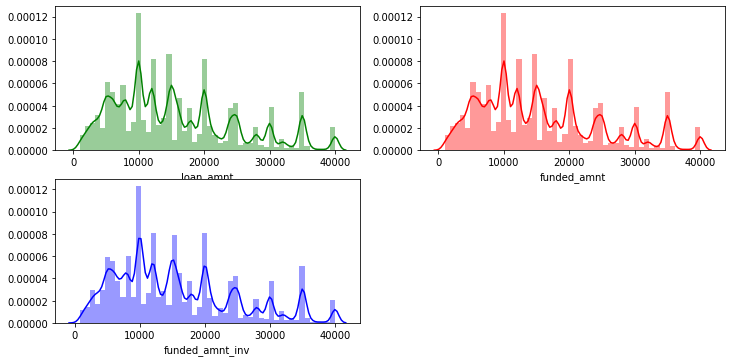

In [77]:
#multiple plots of loans distrbution

plt.figure(figsize=(12, 9))

plt.subplot(321)
sns.distplot(new_df['loan_amnt'], color='green')
plt.title('loan amount distribution')


plt.subplot(322)
sns.distplot(new_df['funded_amnt'], color='red')
plt.title('Amount funded')

plt.subplot(323)
sns.distplot(new_df['funded_amnt_inv'], color='blue')
plt.title('Amount funded by nvestors')

- The distributions above looks almost similar. This shows that most of the loans requested where all fully funded by investors.

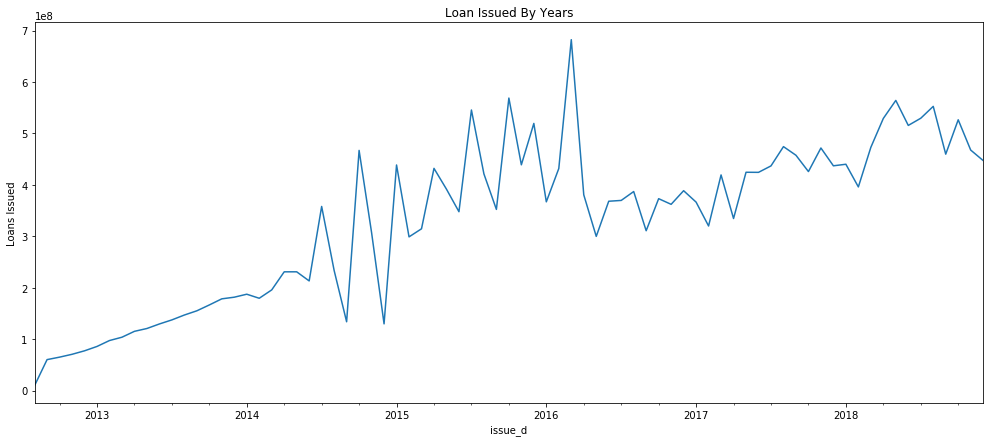

In [95]:
#convert issue_date to datetime column
#group by funded amount and sum then plot
plt.title('Loan Issued By Years')
plt.ylabel('Loans Issued')


new_df['issue_d'] = pd.to_datetime(new_df['issue_d'])
new_df.groupby(new_df['issue_d'])['funded_amnt'].sum().plot(figsize=(17,7))

- 2013 had a steady upward movement in loans issued.
- 2014 saw a spike in increase in loans issued, this is followed by an sharp upward and downward movements in 2015 and similar movements tll 2017.
- From 2017 there's an upward movements in loan colloected.

- The movement in loans collected is due to the economy at that time.

In [87]:
new_df['loan_status'].value_counts()

Fully Paid            790625
Current               641230
Charged Off           195388
Late (31-120 days)     15742
In Grace Period         6347
Late (16-30 days)       3092
Default                   28
Name: loan_status, dtype: int64

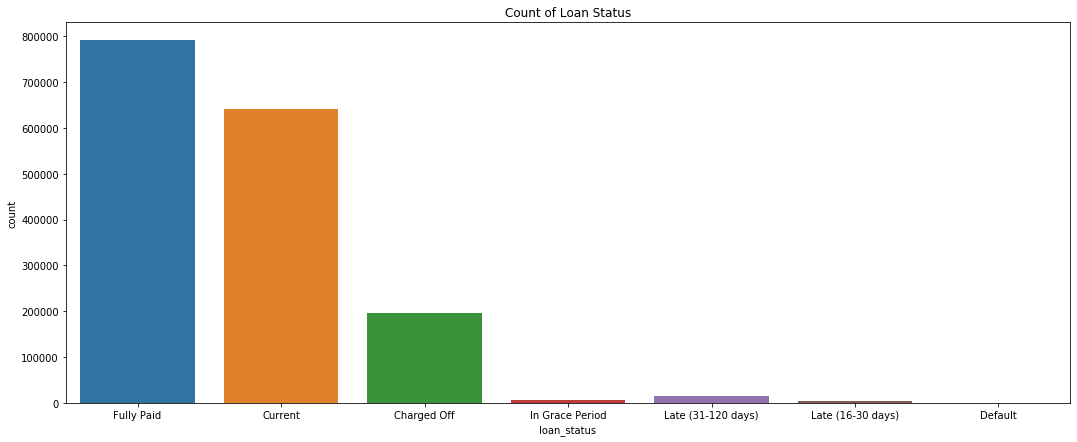

In [85]:
#plot loan status

plt.figure(figsize=(18, 7))
plt.title('Count of Loan Status')

sns.countplot(new_df['loan_status'])

- 48% of loans issued have been fully paid. Not an impressive figure. 
- But also we still have 39% of loans n the current slot.
- Total percentage of deliquent loan is 13%. Looks good but still bad for business.
- The current loans are loans still within their term period.

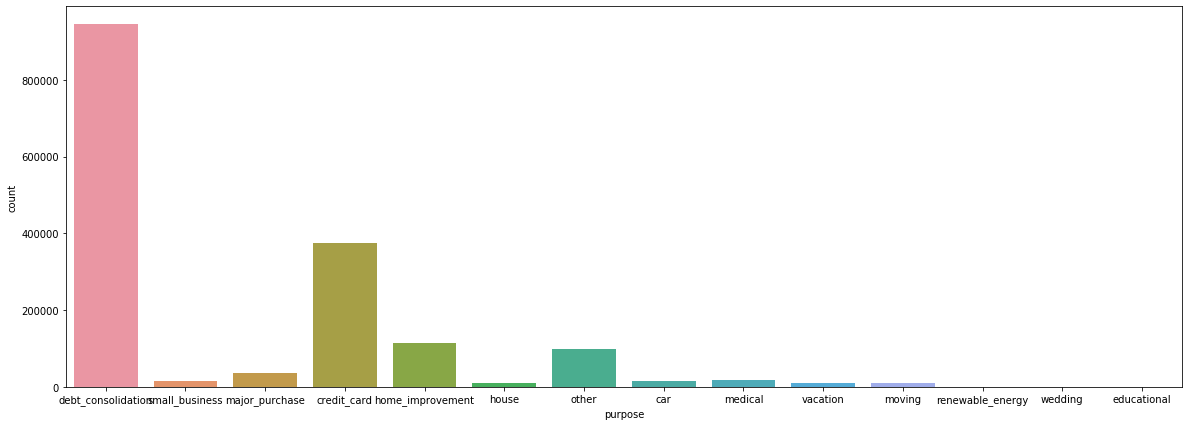

In [28]:
#plot loan purpose
plt.figure(figsize=(20,7))

sns.countplot(new_df.purpose)

- Debt consolidation has more people colleceting loans. Over 800,000 above 50% collected loans as a result of their debt consolidation(loans to payoff loans and consumer debts).
- Credit card seems to be next reason why people collect loans(this can also be seen as debt consolidation).
- Other reason can be home improvements, major purchase, small businesses etc.

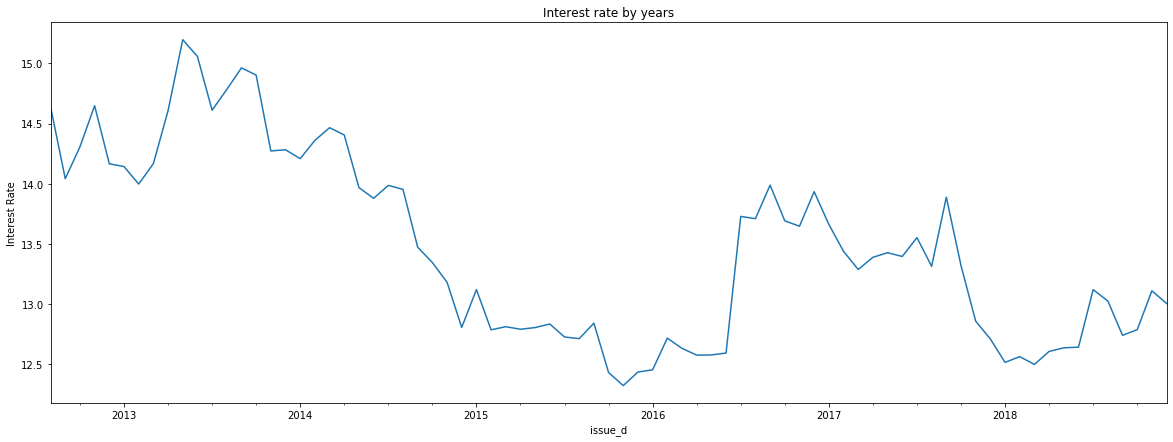

In [94]:
#interest rate
plt.figure(figsize=(20,7))
plt.title('Interest rate by years')
plt.ylabel('Interest Rate')

new_df.groupby(new_df['issue_d'])['int_rate'].mean().plot()

- There where higher interest rates in 2013 and 2014. 
- After the big spike in mid 2013, there was a major drop in interest rate in 2016. Similar movements.
- Thing to note here is that pre 2016 there where higher interest rate. The drop in interest rate might be because of the loan increase.

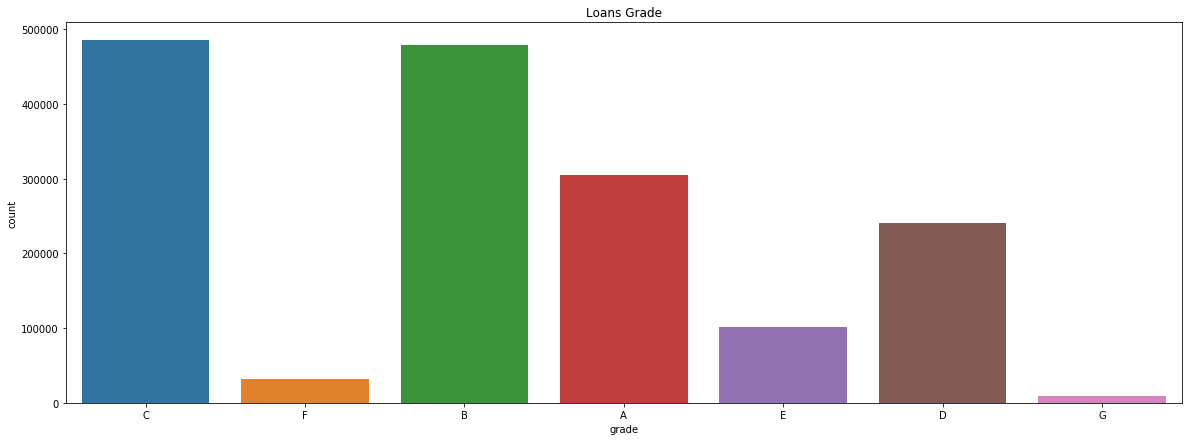

In [96]:
#plot grades
plt.figure(figsize=(20,7))
plt.title('Loans Grade')

sns.countplot(new_df.grade)

- More than 60% of loans are graded B or C.
- Grade A loans account for ~18% of the total loans issued

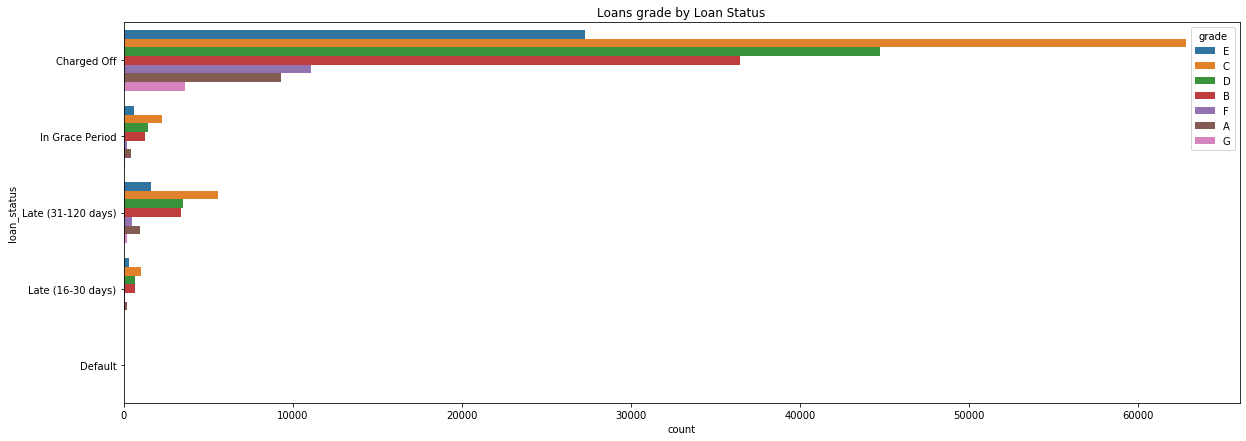

In [100]:
#create new dataframe for deliquent loans.
new = new_df[~(new_df['loan_status'].isin(['Fully Paid', 'Current']))]

plt.figure(figsize=(20,7))
plt.title('Loans grade by Loan Status')
sns.countplot(y=new['loan_status'], hue=new['grade'])

- Majority of loans charged off are grade C loans which os followed by grade D loans. 
- Grade A has less charged off loans.Not up to 1% of charged off loans. That's why they are graded A.

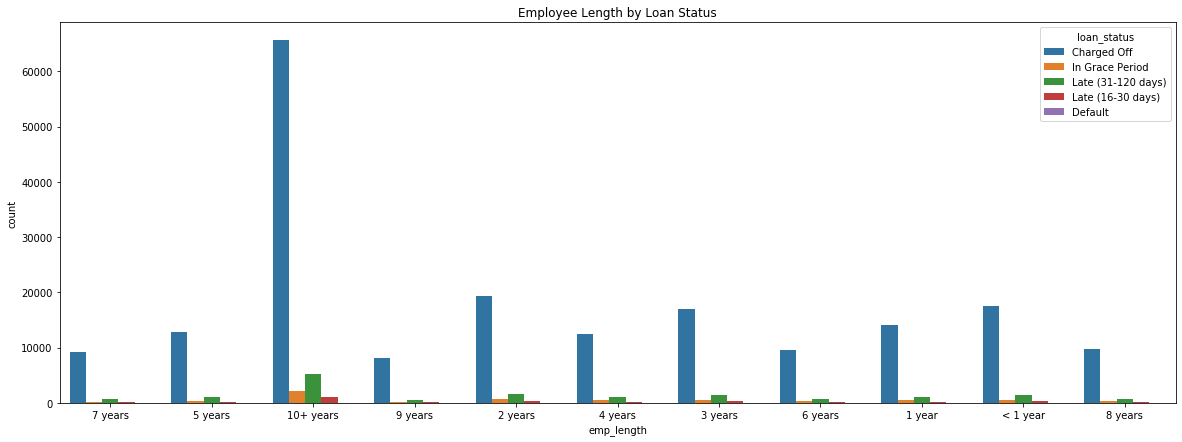

In [101]:
#plot employee length by loan status
plt.figure(figsize=(20, 7))
plt.title('Employee Length by Loan Status')

sns.countplot(new['emp_length'], hue=new['loan_status'])

- Over 30% of charged off loans are from employees have 10+ years of experience.
- For all employement lengths, charged off loans is the leading loan status.

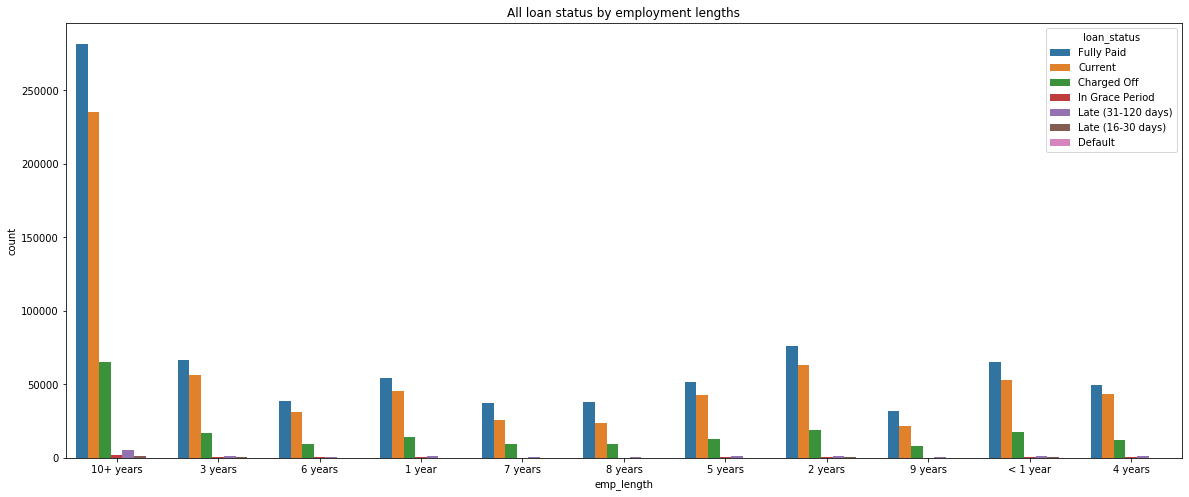

In [105]:
plt.figure(figsize=(20, 8))
plt.title('All loan status by employment lengths')
sns.countplot(new_df['emp_length'], hue=new_df['loan_status'])

- Fully paid and current loans top the charts on all loan lengths.
- 10+ years have more fully paid and current loans loanees.
- This chart also shows 10+ years collect the most loans.

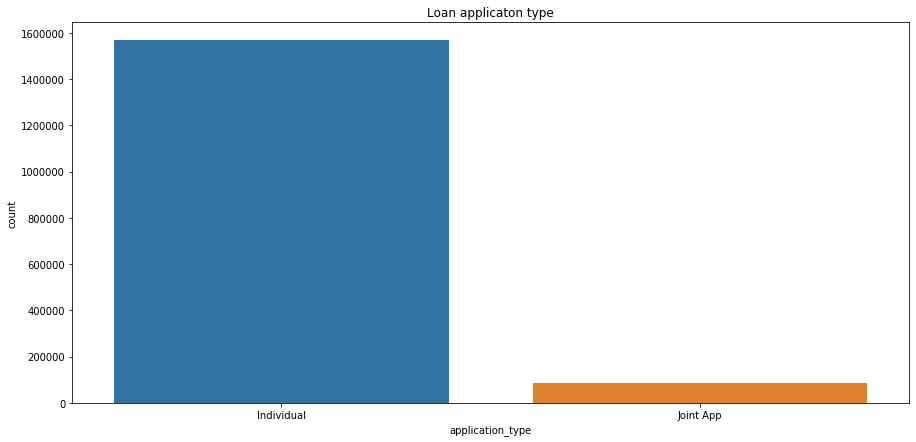

In [111]:
#plot loan application type

plt.figure(figsize=(15, 7))
plt.title('Loan applicaton type')

sns.countplot(new_df.application_type)

- Most loans are individual loans

In [106]:
new_df['emp_length'].value_counts()

10+ years    590897
2 years      160751
3 years      142292
< 1 year     138202
1 year       115287
5 years      108813
4 years      106950
6 years       80470
7 years       73222
8 years       72765
9 years       62803
Name: emp_length, dtype: int64

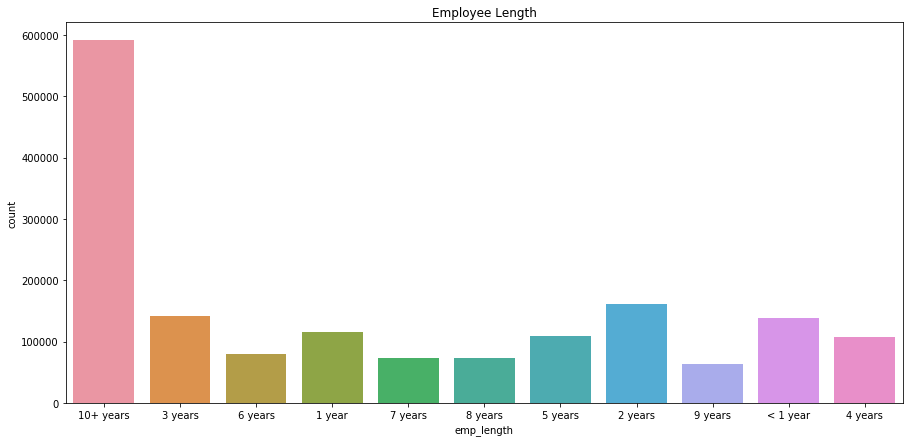

In [112]:
#plot employment length

plt.figure(figsize=(15, 7))
plt.title('Employee Length')

sns.countplot(new_df['emp_length'])

- We have more loanees with 10+ years employment lengths 36%.
- loanees with 6, 7, 8 employment length collect less loans.
- We have people within ther 1st, 2nd and 3 employment year collecting loans.

This distribution from the chart shows more loans are collected in the 10+ years employment.
- We have more people in their 1st, 2nd and 3rd employement year collect loans than we have in their 6, 7, 8 employment years. 

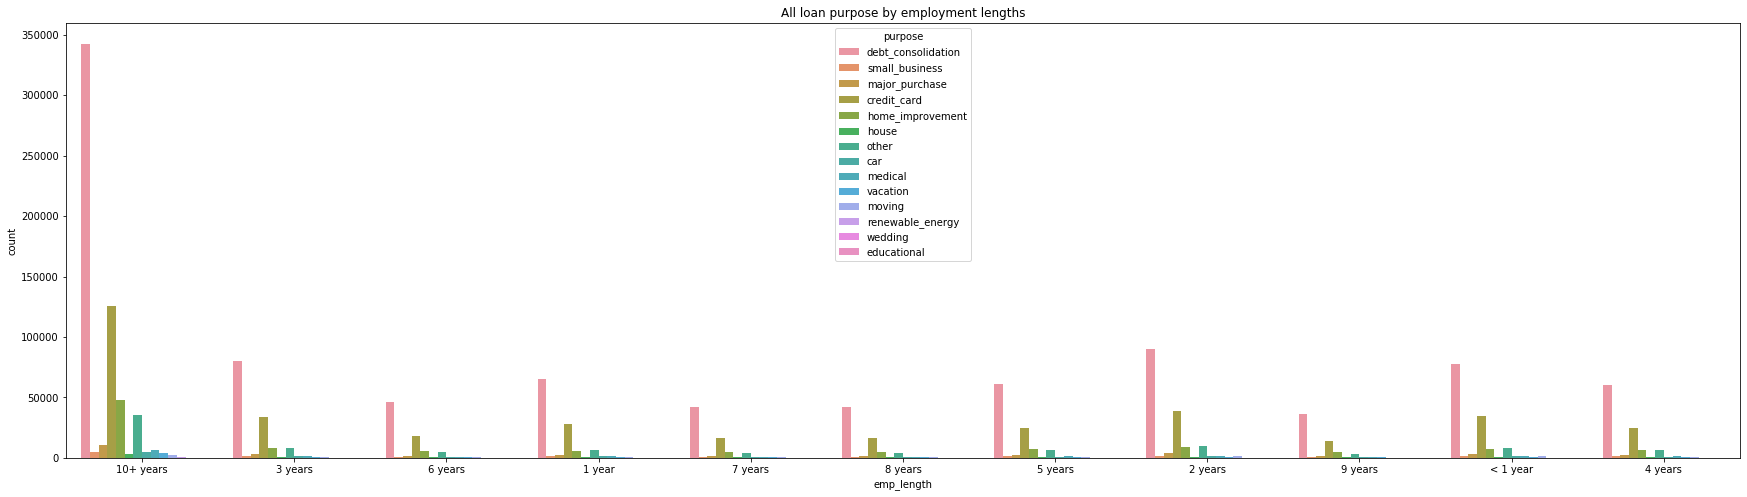

In [115]:
#plot loan purpose by employment length.

plt.figure(figsize=(30, 8))
plt.title('All loan purpose by employment lengths')
sns.countplot(new_df['emp_length'], hue=new_df['purpose'])

- Debt consolidation and credit cards tops the chart again.

After considering the above. Let's look at standout reasons for loan collections.

- Home improvements, Others, Major purchase, Small Businesses are the other standout reasons for loans.

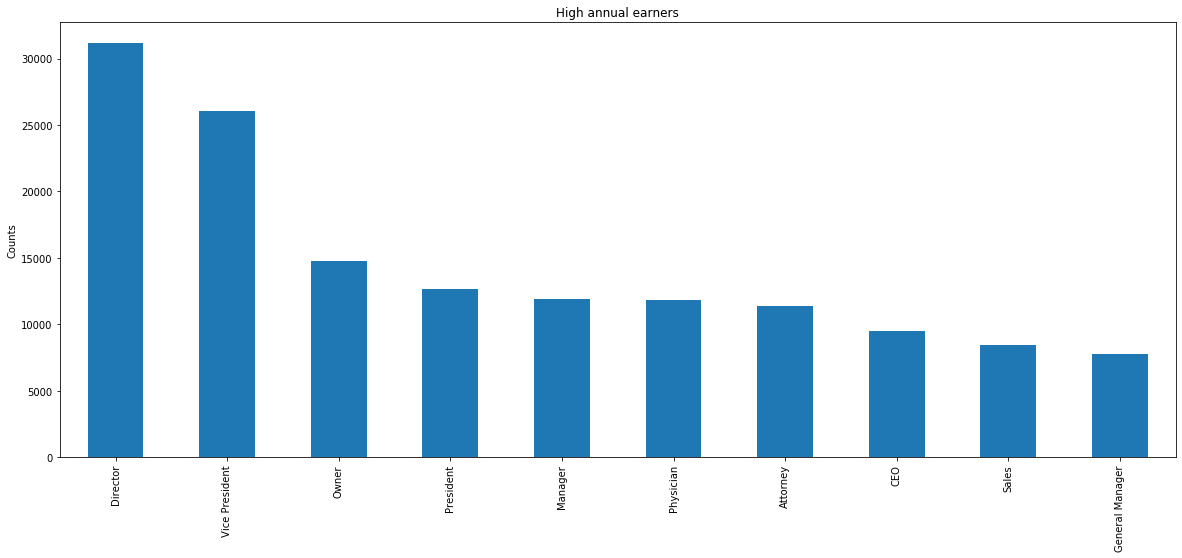

In [132]:
#plot high earners. 
#high annual earners are earners with above 150k annual income.

high_earners = new_df[new_df['annual_inc'] > 150000]

plt.figure(figsize=(20, 8))
plt.title('High annual earners')
plt.ylabel('Counts')

low_earners['emp_title'].value_counts()[:10].plot(kind='bar')

top_ten = high_earners['emp_title'].value_counts()[:10].plot(kind='bar')

For the high earners, we can see that it contains titles such as Directors, VP's, Presdents, CEO's, GM's and Owners etc.
- We have more Directors, VP's, Owners and Presidents on this list.

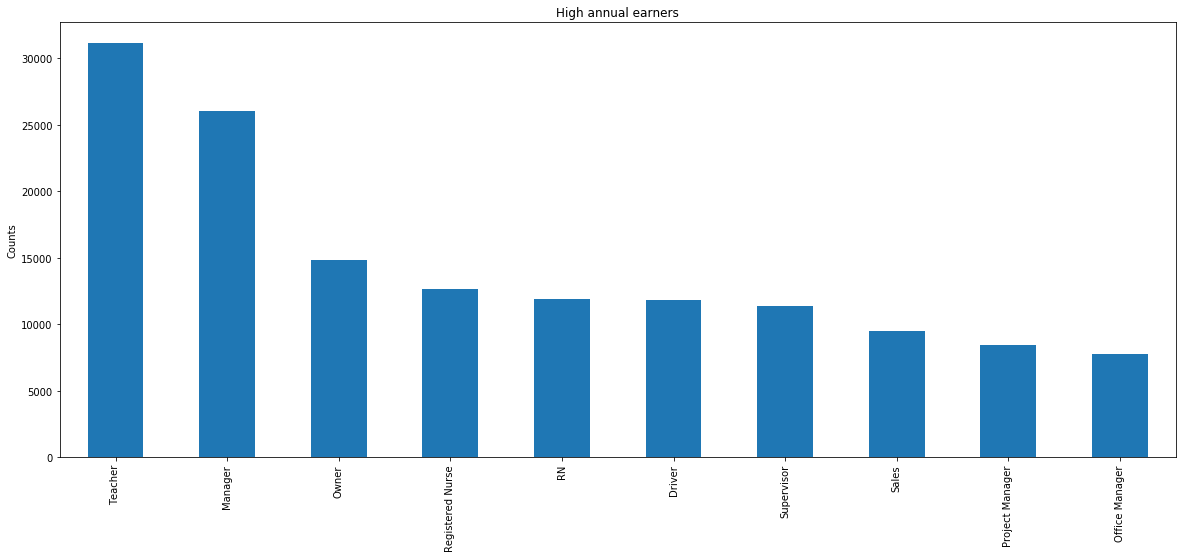

In [133]:
#low earners are earners with annual ncome below 150k
low_earners = new_df[new_df['annual_inc'] < 150000]


plt.figure(figsize=(20, 8))
plt.title('High annual earners')
plt.ylabel('Counts')

low_earners['emp_title'].value_counts()[:10].plot(kind='bar')

This list contains Teachers, Some managers, Onwers too, PM's and Office Mangers etc.|

Text(0.5, 1.0, 'Drector annual Income Distribution')

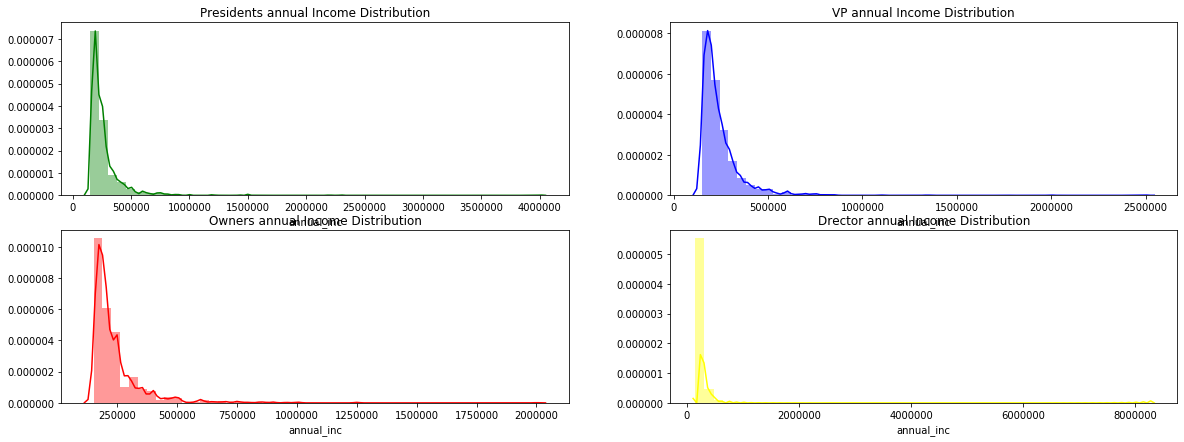

In [138]:
#create new dataframe containing the elite dataset

president = high_earners[high_earners['emp_title'].values == 'President']
vp = high_earners[high_earners['emp_title'].values == 'Vice President']
owner = high_earners[high_earners['emp_title'].values == 'Owner']
director = high_earners[high_earners['emp_title'].values == 'Director']


plt.figure(figsize=(20, 7))

plt.subplot(221)
sns.distplot(president['annual_inc'], color='green')
plt.title('Presidents annual Income Distribution')

plt.subplot(222)
sns.distplot(vp['annual_inc'], color='blue')
plt.title('VP annual Income Distribution')

plt.subplot(223)
sns.distplot(owner['annual_inc'], color='red')
plt.title('Owners annual Income Distribution')

plt.subplot(224)
sns.distplot(director['annual_inc'], color='yellow')
plt.title('Drector annual Income Distribution')

- We can see that they are all skewed to the left.

- Annual Income range for Directors is between 150k to 500k. The outliers is 8000000.

- Annual Income range for Presidents is between 150k to 500k. The outliers is 4000000.

- Annual Income range for VP is between 150k to 500k. The outliers is 2500000.

- Annual Income range for Owners is between 150k to 500k. The outliers is 2000000.




No handles with labels found to put in legend.


Text(0.5, 1.0, 'Owner Home Ownerships')

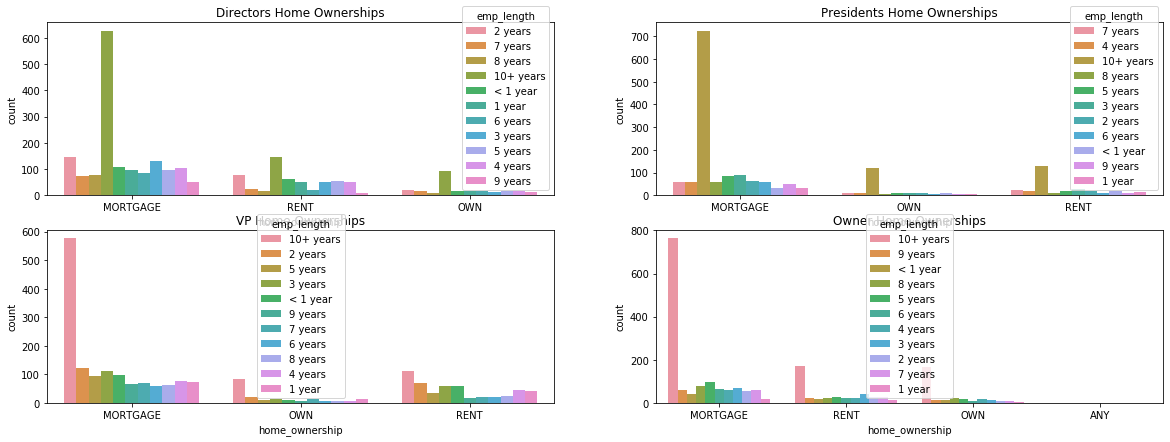

In [144]:
#plot home ownership

plt.figure(figsize=(20, 7))

plt.subplot(221)
plt.title('Directors Home Ownerships')
sns.countplot(director['home_ownership'], hue=director['emp_length'])

plt.subplot(222)
sns.countplot(president['home_ownership'], hue=president['emp_length'])
plt.title('Presidents Home Ownerships')

plt.subplot(223)
sns.countplot(vp['home_ownership'], hue=vp['emp_length'])
plt.title('VP Home Ownerships')

plt.subplot(224)
sns.countplot(owner['home_ownership'], hue=owner['emp_length'])
plt.title('Owner Home Ownerships')

- We have more mortgage owners and few home owners.
- We also have directors in their 1 year employment length.

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Owner emp_length by loan status')

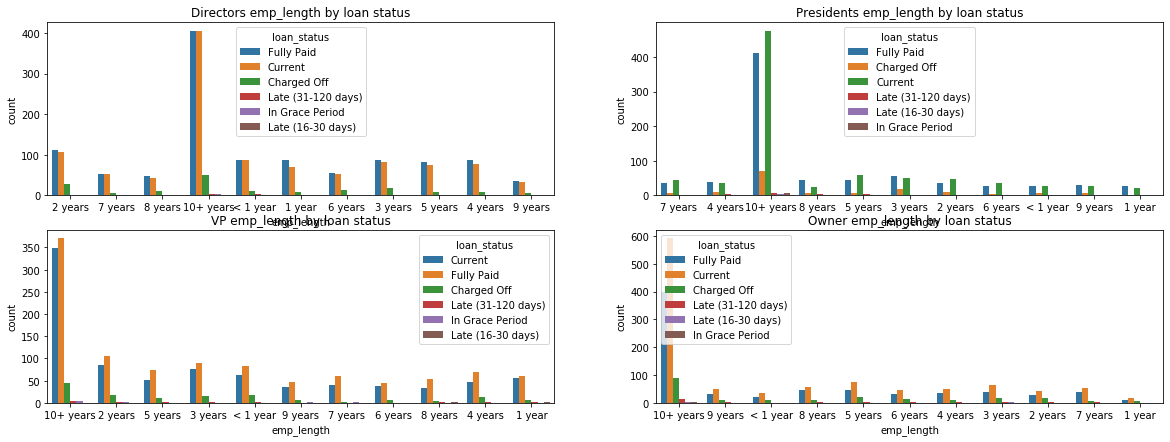

In [145]:
#plot loan status
plt.figure(figsize=(20, 7))
plt.legend()

plt.subplot(221)
plt.title('Directors emp_length by loan status')
sns.countplot(director['emp_length'], hue=director['loan_status'])

plt.subplot(222)
sns.countplot(president['emp_length'], hue=president['loan_status'])
plt.title('Presidents emp_length by loan status')

plt.subplot(223)
sns.countplot(vp['emp_length'], hue=vp['loan_status'])
plt.title('VP emp_length by loan status')

plt.subplot(224)
sns.countplot(owner['emp_length'], hue=owner['loan_status'])
plt.title('Owner emp_length by loan status')

- Most dirctors have paid their loans fully/ are current loan takers.
- 10+ years has the highest population.

Text(0.5, 1.0, 'Owner loan amount distribution')

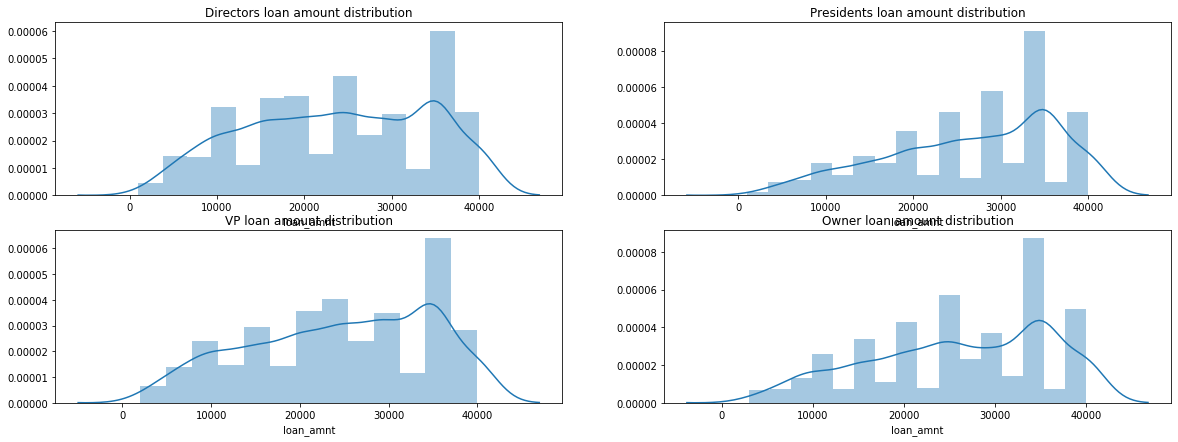

In [146]:
#plot loan amount
plt.figure(figsize=(20, 7))

plt.subplot(221)
plt.title('Directors loan amount distribution')
sns.distplot(director['loan_amnt'])

plt.subplot(222)
sns.distplot(president['loan_amnt'])
plt.title('Presidents loan amount distribution')

plt.subplot(223)
sns.distplot(vp['loan_amnt'])
plt.title('VP loan amount distribution')

plt.subplot(224)
sns.distplot(owner['loan_amnt'])
plt.title('Owner loan amount distribution')

- They all have similar distrbution.
- The highest loan collected was 40000 for all the ditributions.
- Loan amount between 30000 and 40000 have been collected the most.

Text(0.5, 1.0, 'Owner loan purpose')

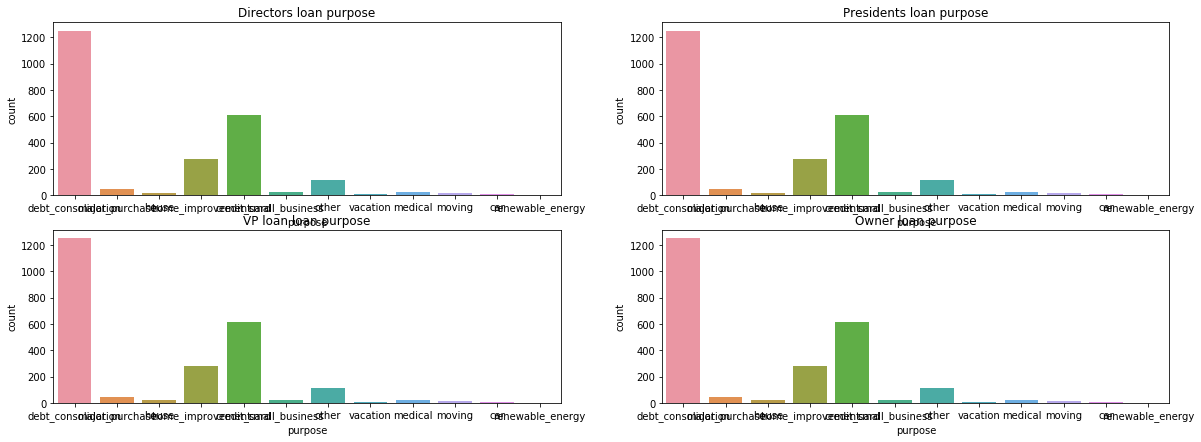

In [147]:
#plot loan purpose
plt.figure(figsize=(20, 7))

plt.subplot(221)
plt.title('Directors loan purpose')
sns.countplot(director['purpose'])

plt.subplot(222)
sns.countplot(director['purpose'])
plt.title('Presidents loan purpose')

plt.subplot(223)
sns.countplot(director['purpose'])
plt.title('VP loan loan purpose')

plt.subplot(224)
sns.countplot(director['purpose'])
plt.title('Owner loan purpose')

- These high earners take more loans for debt consolidaton, home improvements, credit cards, small purchases and others.